In [26]:
import os
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.utils import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold

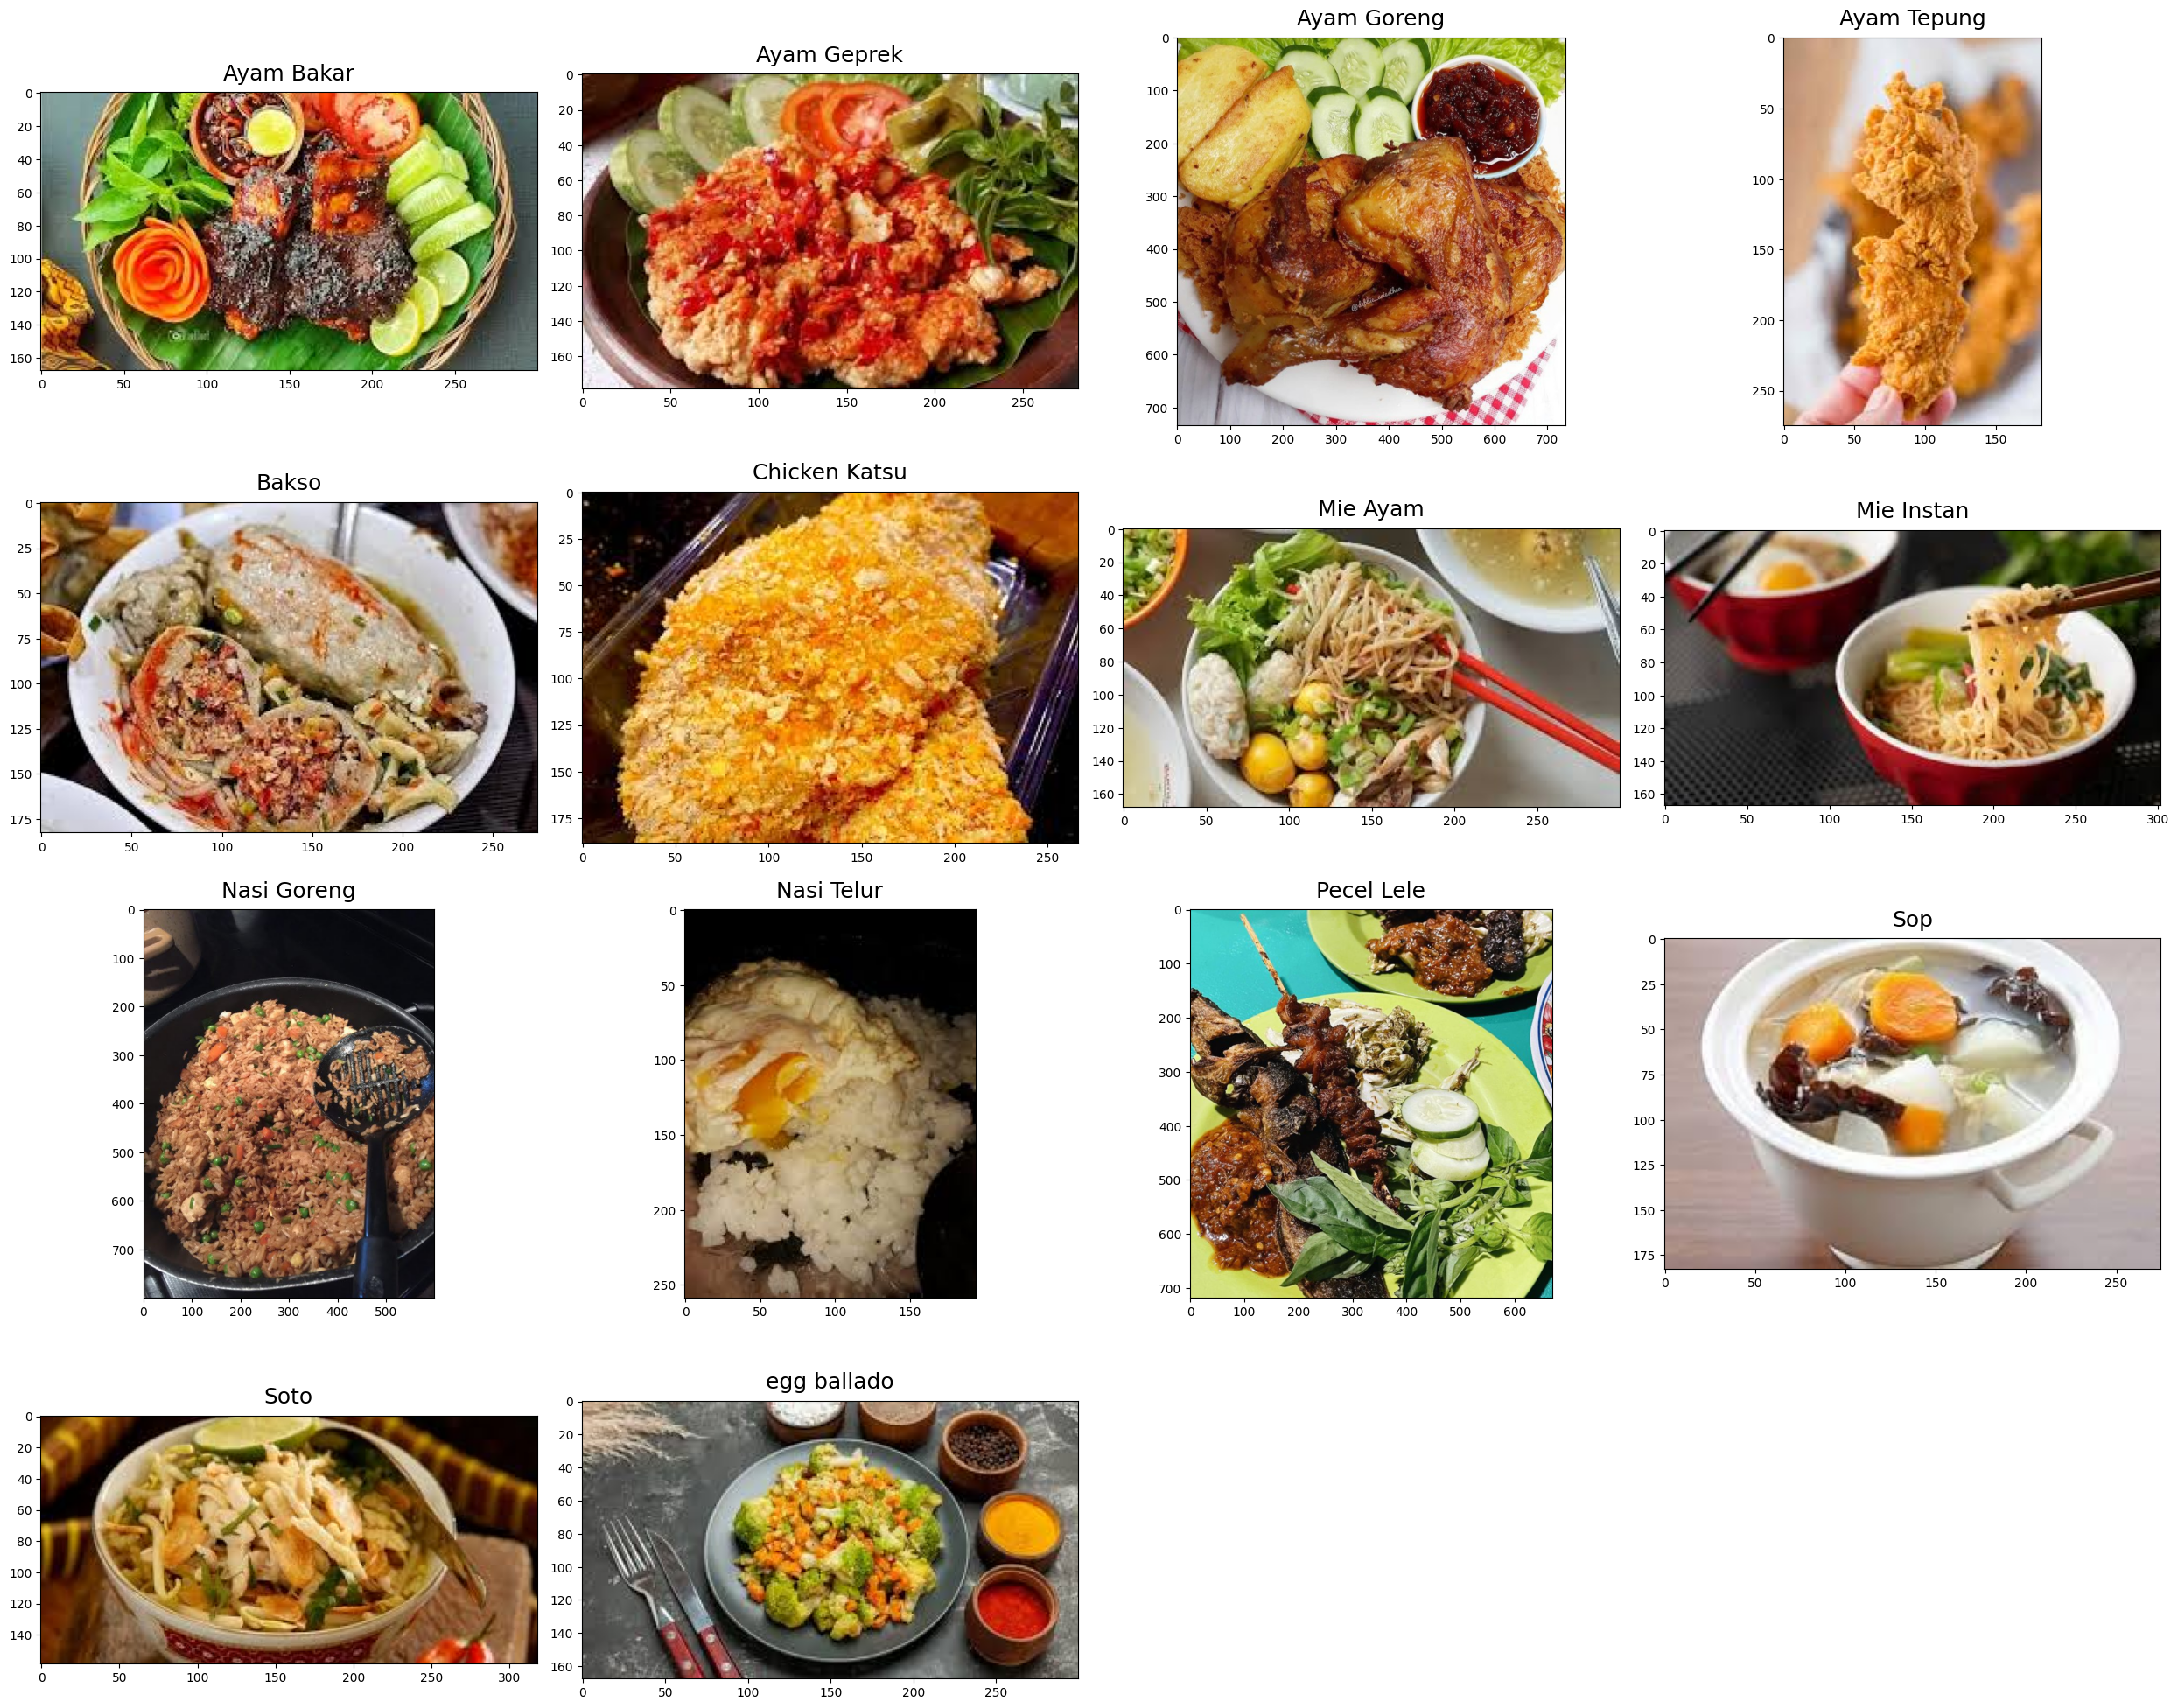

In [27]:
train_dir = "Image Eye\Train"
test_dir = "Image Eye\Test"
images = []

for food_folder in sorted(os.listdir(train_dir)):
    food_items = os.listdir(train_dir + '/' + food_folder)
    food_selected = np.random.choice(food_items)
    images.append(os.path.join(train_dir,food_folder,food_selected))

fig=plt.figure(1, figsize=(25, 25))

for subplot,image_ in enumerate(images):
    category=image_.split('\\')[-2]
    imgs = plt.imread(image_)
    a,b,c=imgs.shape
    fig=plt.subplot(5, 4, subplot+1)
    fig.set_title(category, pad = 10,size=18)
    plt.imshow(imgs)

plt.tight_layout()

Image Generator/Augumentation

In [30]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1/255)

In [31]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (224,224),
                                                    batch_size = 32,
                                                    class_mode= 'categorical')
val_generator = validation_datagen.flow_from_directory(test_dir,
                                                       target_size = (224,224),
                                                       batch_size=32, 
                                                       class_mode = 'categorical')

Found 4783 images belonging to 14 classes.
Found 976 images belonging to 14 classes.


Transfer Learning

In [40]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers[:-5]:
    layer.trainable = False

trainable_layers = [layer.name for layer in base_model.layers if layer.trainable]
print('layer yang dipakai')
for layer in trainable_layers:
    print(layer)

layer yang dipakai
conv5_block3_2_relu
conv5_block3_3_conv
conv5_block3_3_bn
conv5_block3_add
conv5_block3_out


In [ ]:
ResNetModel = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense()
])